In [2]:
# import torch
# torch.cuda.set_device(0)  # 0 = the first *visible* GPU after masking
# x = torch.rand(1).to("cuda:0")
# print(torch.cuda.get_device_name(0))

In [30]:
import os
import pandas as pd
import numpy as np
import rasterio
import matplotlib.pyplot as plt
from glob import glob
from tqdm import tqdm
import seaborn as sns

# Set up visualization settings
plt.style.use('default')
sns.set_palette("husl")

# Define data directories
data_dir = '/home/minhnl2/data/extracted_data'
index_file = '/home/minhnl2/data/index.csv'

print(f"Data directory: {data_dir}")
print(f"Index file: {index_file}")

Data directory: /home/minhnl2/data/extracted_data
Index file: /home/minhnl2/data/index.csv


In [ ]:
# Load the index file containing filenames and coordinates
index_df = pd.read_csv(index_file)
print(f"\nIndex file shape: {index_df.shape}")
print(f"Total patches in index: {len(index_df):,}")
print(f"\nFirst few rows:")
print(index_df.head(10))


Index file shape: (100000, 3)
Total patches in index: 100,000

First few rows:
            fn         lon        lat
0  patch_0.tif -124.652894  41.331315
1  patch_1.tif   51.253355  24.517396
2  patch_2.tif  112.248149  42.969783
3  patch_3.tif   19.013767 -17.116714
4  patch_4.tif -120.241545  62.481208
5  patch_5.tif   23.845330  41.529312
6  patch_6.tif  -68.108199 -78.712850
7  patch_7.tif   26.800696  27.616751
8  patch_8.tif  -88.051574  41.070761
9  patch_9.tif   24.649929  20.076766


In [6]:
all_tif_files = glob(os.path.join(data_dir, '*.tif'))
print(f"\nTotal TIF files found in directory: {len(all_tif_files):,}")

# Check if all indexed files exist
existing_files = []
missing_files = []

print("\nChecking first 100 files from index...")
for idx, row in index_df.head(100).iterrows():
    filepath = os.path.join(data_dir, row['fn'])
    if os.path.exists(filepath):
        existing_files.append(row['fn'])
    else:
        missing_files.append(row['fn'])

print(f"Files checked: 100")
print(f"Existing: {len(existing_files)}")
print(f"Missing: {len(missing_files)}")

if missing_files:
    print(f"\nSample missing files: {missing_files[:5]}")



Total TIF files found in directory: 94,164

Checking first 100 files from index...
Files checked: 100
Existing: 95
Missing: 5

Sample missing files: ['patch_94.tif', 'patch_95.tif', 'patch_96.tif', 'patch_98.tif', 'patch_99.tif']


In [7]:
fp = all_tif_files[0]

with rasterio.open(fp) as src:
    for attr in dir(src):
        print(f"  {attr}")

  __class__
  __delattr__
  __dict__
  __dir__
  __doc__
  __enter__
  __eq__
  __exit__
  __format__
  __ge__
  __getattribute__
  __gt__
  __hash__
  __init__
  __init_subclass__
  __le__
  __lt__
  __module__
  __ne__
  __new__
  __pyx_vtable__
  __reduce__
  __reduce_ex__
  __repr__
  __setattr__
  __setstate__
  __sizeof__
  __str__
  __subclasshook__
  __weakref__
  _block_shapes
  _closed
  _count
  _crs
  _crs_wkt
  _descriptions
  _dtypes
  _env
  _gcps
  _get_crs
  _get_rpcs
  _handle_crswkt
  _has_band
  _has_gcps_or_rpcs
  _mask_flags
  _nodatavals
  _offsets
  _read
  _rpcs
  _scales
  _set_all_descriptions
  _set_all_offsets
  _set_all_scales
  _set_all_units
  _set_attrs_from_dataset_handle
  _set_crs
  _set_gcps
  _set_nodatavals
  _set_rpcs
  _transform
  _units
  block_shapes
  block_size
  block_window
  block_windows
  bounds
  checksum
  close
  closed
  colorinterp
  colormap
  compression
  count
  crs
  dataset_mask
  descriptions
  driver
  dtypes
  files
  gcp

In [8]:
sample_size = 20
sample_files = [f for f in all_tif_files[:sample_size]]

# Store properties
image_properties = []

print(f"\nAnalyzing {sample_size} sample images...\n")

for filepath in sample_files:
    try:
        with rasterio.open(filepath) as src:
            props = {
                'filename': os.path.basename(filepath),
                'width': src.width,
                'height': src.height,
                'bands': src.count,
                'dtype': str(src.dtypes[0]),
                'crs': str(src.crs),
                'nodata': src.nodata,
                'bounds': src.bounds
            }
            image_properties.append(props)
    except Exception as e:
        print(f"Error reading {filepath}: {e}")

# Convert to dataframe for analysis
props_df = pd.DataFrame(image_properties)

print(props_df[['filename', 'width', 'height', 'bands', 'dtype', 'crs', 'nodata', 'bounds']].head(10))

print(f"\n\nUnique dimensions:")
print(f"Width: {props_df['width'].unique()}")
print(f"Height: {props_df['height'].unique()}")
print(f"Bands: {props_df['bands'].unique()}")
print(f"Data types: {props_df['dtype'].unique()}")
print(f"CRS: {props_df['crs'].unique()}")



Analyzing 20 sample images...

          filename  width  height  bands   dtype         crs nodata  \
0  patch_17846.tif    256     256     12  uint16  EPSG:32755   None   
1  patch_64496.tif    256     256     12  uint16  EPSG:32646   None   
2  patch_17434.tif    256     256     12  uint16  EPSG:32619   None   
3  patch_56381.tif    256     256     12  uint16  EPSG:32630   None   
4  patch_25323.tif    256     256     12  uint16  EPSG:32654   None   
5  patch_48646.tif    256     256     12  uint16  EPSG:32750   None   
6  patch_68883.tif    256     256     12  uint16  EPSG:32618   None   
7   patch_5882.tif    256     256     12  uint16  EPSG:32614   None   
8  patch_76136.tif    256     256     12  uint16  EPSG:32719   None   
9  patch_44621.tif    256     256     12  uint16  EPSG:32629   None   

                                       bounds  
0  (349995.0, 7224265.0, 352555.0, 7226825.0)  
1  (689705.0, 7449605.0, 692265.0, 7452165.0)  
2    (364015.0, 940415.0, 366575.0, 942975

In [9]:
def normalize_band(band_data, percentile_clip=2):
    """
    Normalize band data to 0-1 range with percentile clipping.
    This helps improve visualization by removing outliers.
    """
    p_low = np.percentile(band_data, percentile_clip)
    p_high = np.percentile(band_data, 100 - percentile_clip)
    normalized = np.clip((band_data - p_low) / (p_high - p_low), 0, 1)
    return normalized

In [10]:
def visualize_all_bands(filepath, show_plot=True):
    # Read the satellite image data
    with rasterio.open(filepath) as src:
        data = src.read()  # Shape: (bands, height, width)
        num_bands = data.shape[0]
    
    # Create figure with subplots for each band
    cols = min(4, num_bands)
    rows = (num_bands + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(4*cols, 4*rows))
    
    # Flatten axes array for easier indexing
    if num_bands == 1:
        axes = [axes]
    else:
        axes = axes.flatten() if num_bands > 1 else [axes]
    
    filename = os.path.basename(filepath)
    
    # Plot each band
    for i in range(num_bands):
        ax = axes[i]
        band_img = normalize_band(data[i])
        
        # Display the band
        im = ax.imshow(band_img, cmap='viridis')
        ax.set_title(f'Band {i+1}')
        ax.axis('off')
        
        # Add colorbar
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    # Hide unused axes
    for i in range(num_bands, len(axes)):
        axes[i].axis('off')
    
    fig.suptitle(f'Individual Bands: {filename}', fontweight='bold', fontsize=20)
    plt.tight_layout()
    
    if show_plot:
        plt.show()
    
    return fig


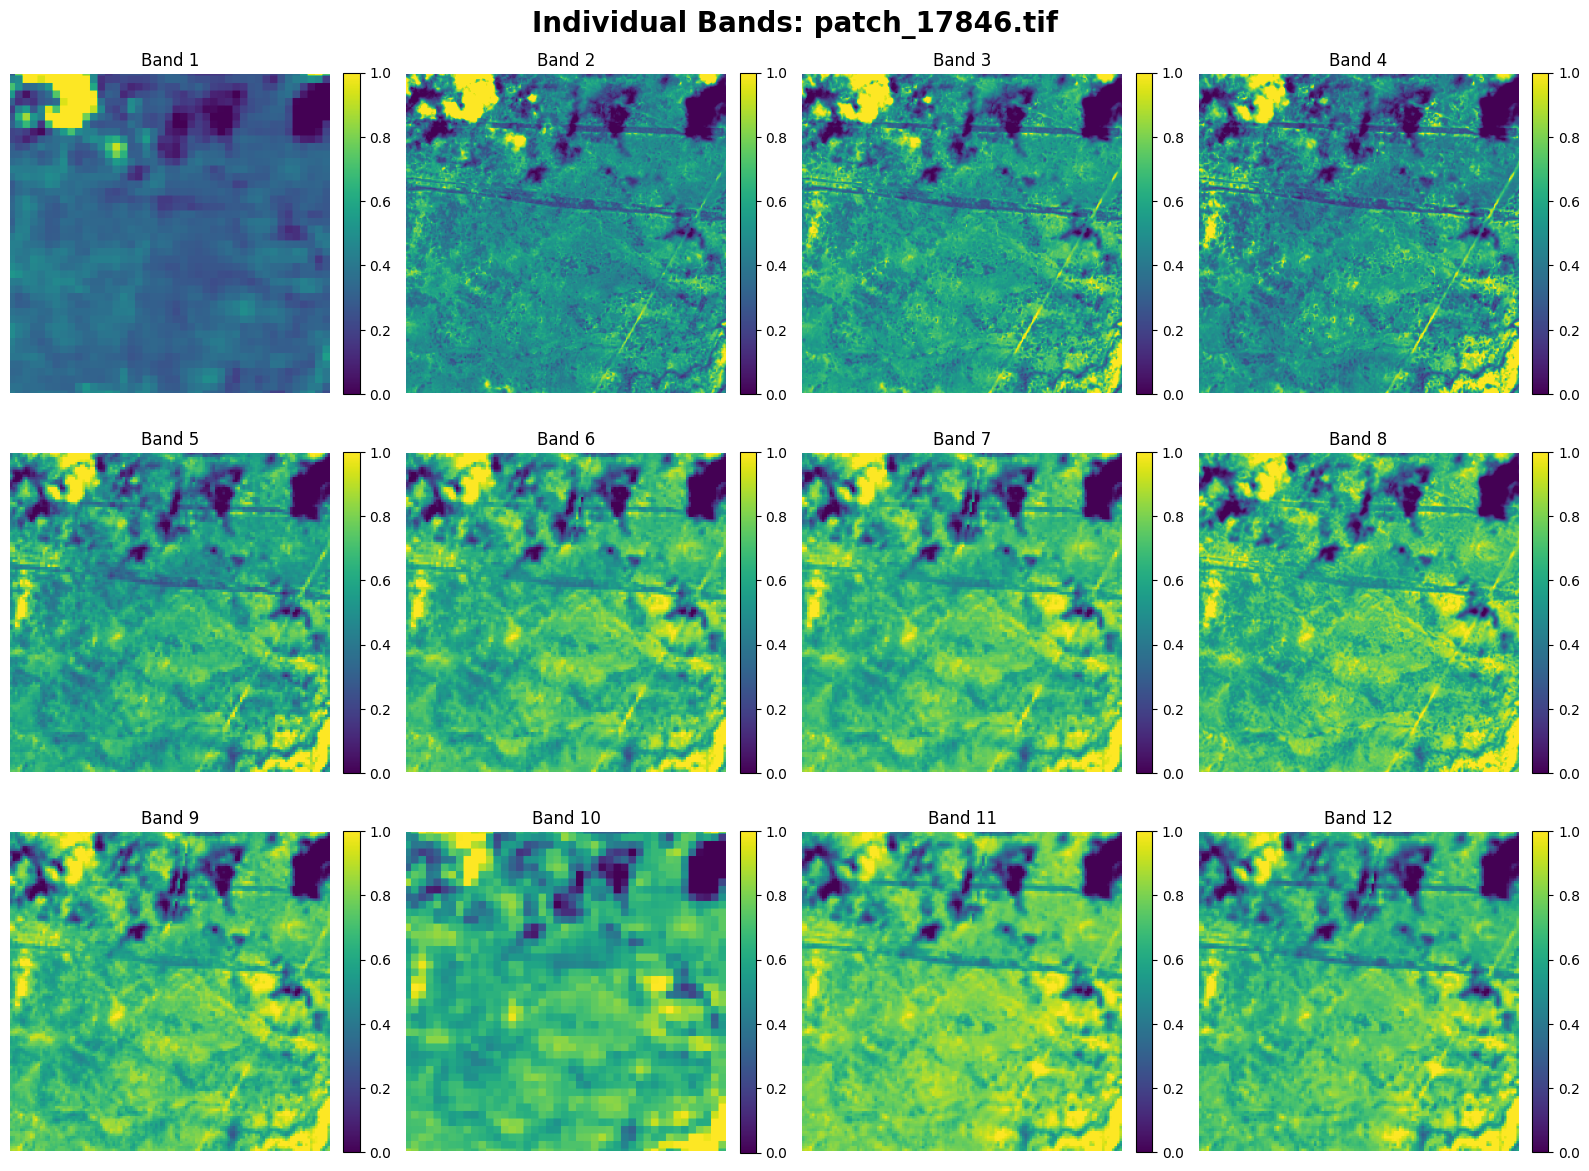

In [15]:
sample_file = all_tif_files[0]

# Display all individual bands
fig = visualize_all_bands(sample_file, show_plot=True)


In [16]:
def visualize_band_combinations(filepath, combinations='all', show_plot=True):
    """
    - True color: RGB representation (B4, B3, B2)
    - False color: Vegetation analysis (B8, B4, B3)
    - False color urban: Urban areas (B12, B11, B4)
    - Natural color: Enhanced natural color
    - NDVI: Vegetation index
    - NDWI: Water index
    - NDSI: Snow index
    - Moisture index: Soil moisture
    - SWIR: Shortwave infrared
    """
    # Read the satellite image data
    with rasterio.open(filepath) as src:
        data = src.read().astype(float)  # Shape: (bands, height, width)
        num_bands = data.shape[0]
    
    filename = os.path.basename(filepath)
    visualizations = []
    
    # Define all available combinations
    # Assuming Sentinel-2 band order: B2, B3, B4, B8, B8A, B11, B12
    # Band indices: 0=B2(Blue), 1=B3(Green), 2=B4(Red), 3=B8(NIR), 4=B8A, 5=B11(SWIR1), 6=B12(SWIR2)
    
    # 1. True Color (Natural RGB) - B4, B3, B2
    if num_bands >= 3:
        rgb = np.stack([
            normalize_band(data[2]),  # Red (B4)
            normalize_band(data[1]),  # Green (B3)
            normalize_band(data[0])   # Blue (B2)
        ], axis=-1)
        visualizations.append(('True Color\n(B4, B3, B2)', rgb, None, 'RGB natural color'))
    
    # 2. False Color (Vegetation) - B8, B4, B3
    if num_bands >= 4:
        false_color = np.stack([
            normalize_band(data[3]),  # NIR (B8) -> Red
            normalize_band(data[2]),  # Red (B4) -> Green
            normalize_band(data[1])   # Green (B3) -> Blue
        ], axis=-1)
        visualizations.append(('False Color\n(B8, B4, B3)', false_color, None, 'Vegetation appears red'))
    
    # 3. Highlight Optimized Natural Color
    if num_bands >= 4:
        natural = np.stack([
            normalize_band(data[3]),  # NIR (B8)
            normalize_band(data[2]),  # Red (B4)
            normalize_band(data[1])   # Green (B3)
        ], axis=-1)
        visualizations.append(('Natural Color Enhanced\n(B8, B4, B3)', natural, None, 'Enhanced natural color'))
    
    # 4. NDVI - Normalized Difference Vegetation Index
    if num_bands >= 4:
        # NDVI = (NIR - Red) / (NIR + Red)
        nir = data[3]
        red = data[2]
        ndvi = np.where((nir + red) != 0, (nir - red) / (nir + red), 0)
        visualizations.append(('NDVI\n(B8-B4)/(B8+B4)', ndvi, 'RdYlGn', 'Vegetation health'))
    
    # 5. False Color Urban - B12, B11, B4
    if num_bands >= 7:
        urban = np.stack([
            normalize_band(data[6]),  # SWIR2 (B12)
            normalize_band(data[5]),  # SWIR1 (B11)
            normalize_band(data[2])   # Red (B4)
        ], axis=-1)
        visualizations.append(('False Color Urban\n(B12, B11, B4)', urban, None, 'Urban areas highlighted'))
    
    # 6. Moisture Index - (B8A - B11) / (B8A + B11)
    if num_bands >= 6:
        b8a = data[4]
        b11 = data[5]
        moisture = np.where((b8a + b11) != 0, (b8a - b11) / (b8a + b11), 0)
        visualizations.append(('Moisture Index\n(B8A-B11)/(B8A+B11)', moisture, 'YlGnBu', 'Soil moisture'))
    
    # 7. SWIR - B12, B8A, B4
    if num_bands >= 7:
        swir = np.stack([
            normalize_band(data[6]),  # SWIR2 (B12)
            normalize_band(data[4]),  # NIR (B8A)
            normalize_band(data[2])   # Red (B4)
        ], axis=-1)
        visualizations.append(('SWIR\n(B12, B8A, B4)', swir, None, 'Shortwave infrared'))
    
    # 8. NDWI - Normalized Difference Water Index
    if num_bands >= 4:
        # NDWI = (Green - NIR) / (Green + NIR) for water detection
        green = data[1]
        nir = data[3]
        ndwi = np.where((green + nir) != 0, (green - nir) / (green + nir), 0)
        visualizations.append(('NDWI\n(B3-B8)/(B3+B8)', ndwi, 'Blues', 'Water detection'))
    
    # 9. NDSI - Normalized Difference Snow Index
    if num_bands >= 6:
        # NDSI = (Green - SWIR) / (Green + SWIR)
        green = data[1]
        swir = data[5]  # B11
        ndsi = np.where((green + swir) != 0, (green - swir) / (green + swir), 0)
        visualizations.append(('NDSI\n(B3-B11)/(B3+B11)', ndsi, 'coolwarm', 'Snow/ice detection'))
    
    # Create figure with subplots
    num_plots = len(visualizations)
    cols = min(3, num_plots)
    rows = (num_plots + cols - 1) // cols
    fig, axes = plt.subplots(rows, cols, figsize=(6*cols, 5*rows))
    
    # Flatten axes array for easier indexing
    if num_plots == 1:
        axes = [axes]
    else:
        axes = axes.flatten()
    
    # Plot each visualization
    for idx, (title, img_data, cmap, description) in enumerate(visualizations):
        if idx >= len(axes):
            break
        
        ax = axes[idx]
        
        # Display the image
        if cmap is None:
            # RGB composite
            ax.imshow(img_data)
        else:
            # Single band with colormap
            im = ax.imshow(img_data, cmap=cmap)
            # Add colorbar
            cbar = plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
            cbar.ax.tick_params(labelsize=8)
        
        ax.set_title(title)
        ax.axis('off')
        
        # Add description text at bottom
        ax.text(0.5, -0.05, description, transform=ax.transAxes,
               ha='center', va='top', fontsize=8, style='italic', color='gray')
    
    # Hide unused axes
    for idx in range(len(visualizations), len(axes)):
        axes[idx].axis('off')
    
    fig.suptitle(f'Band Combinations Analysis: {filename}', 
                fontsize=20, fontweight='bold', y=0.995)
    plt.tight_layout()
    
    if show_plot:
        plt.show()
    
    return fig



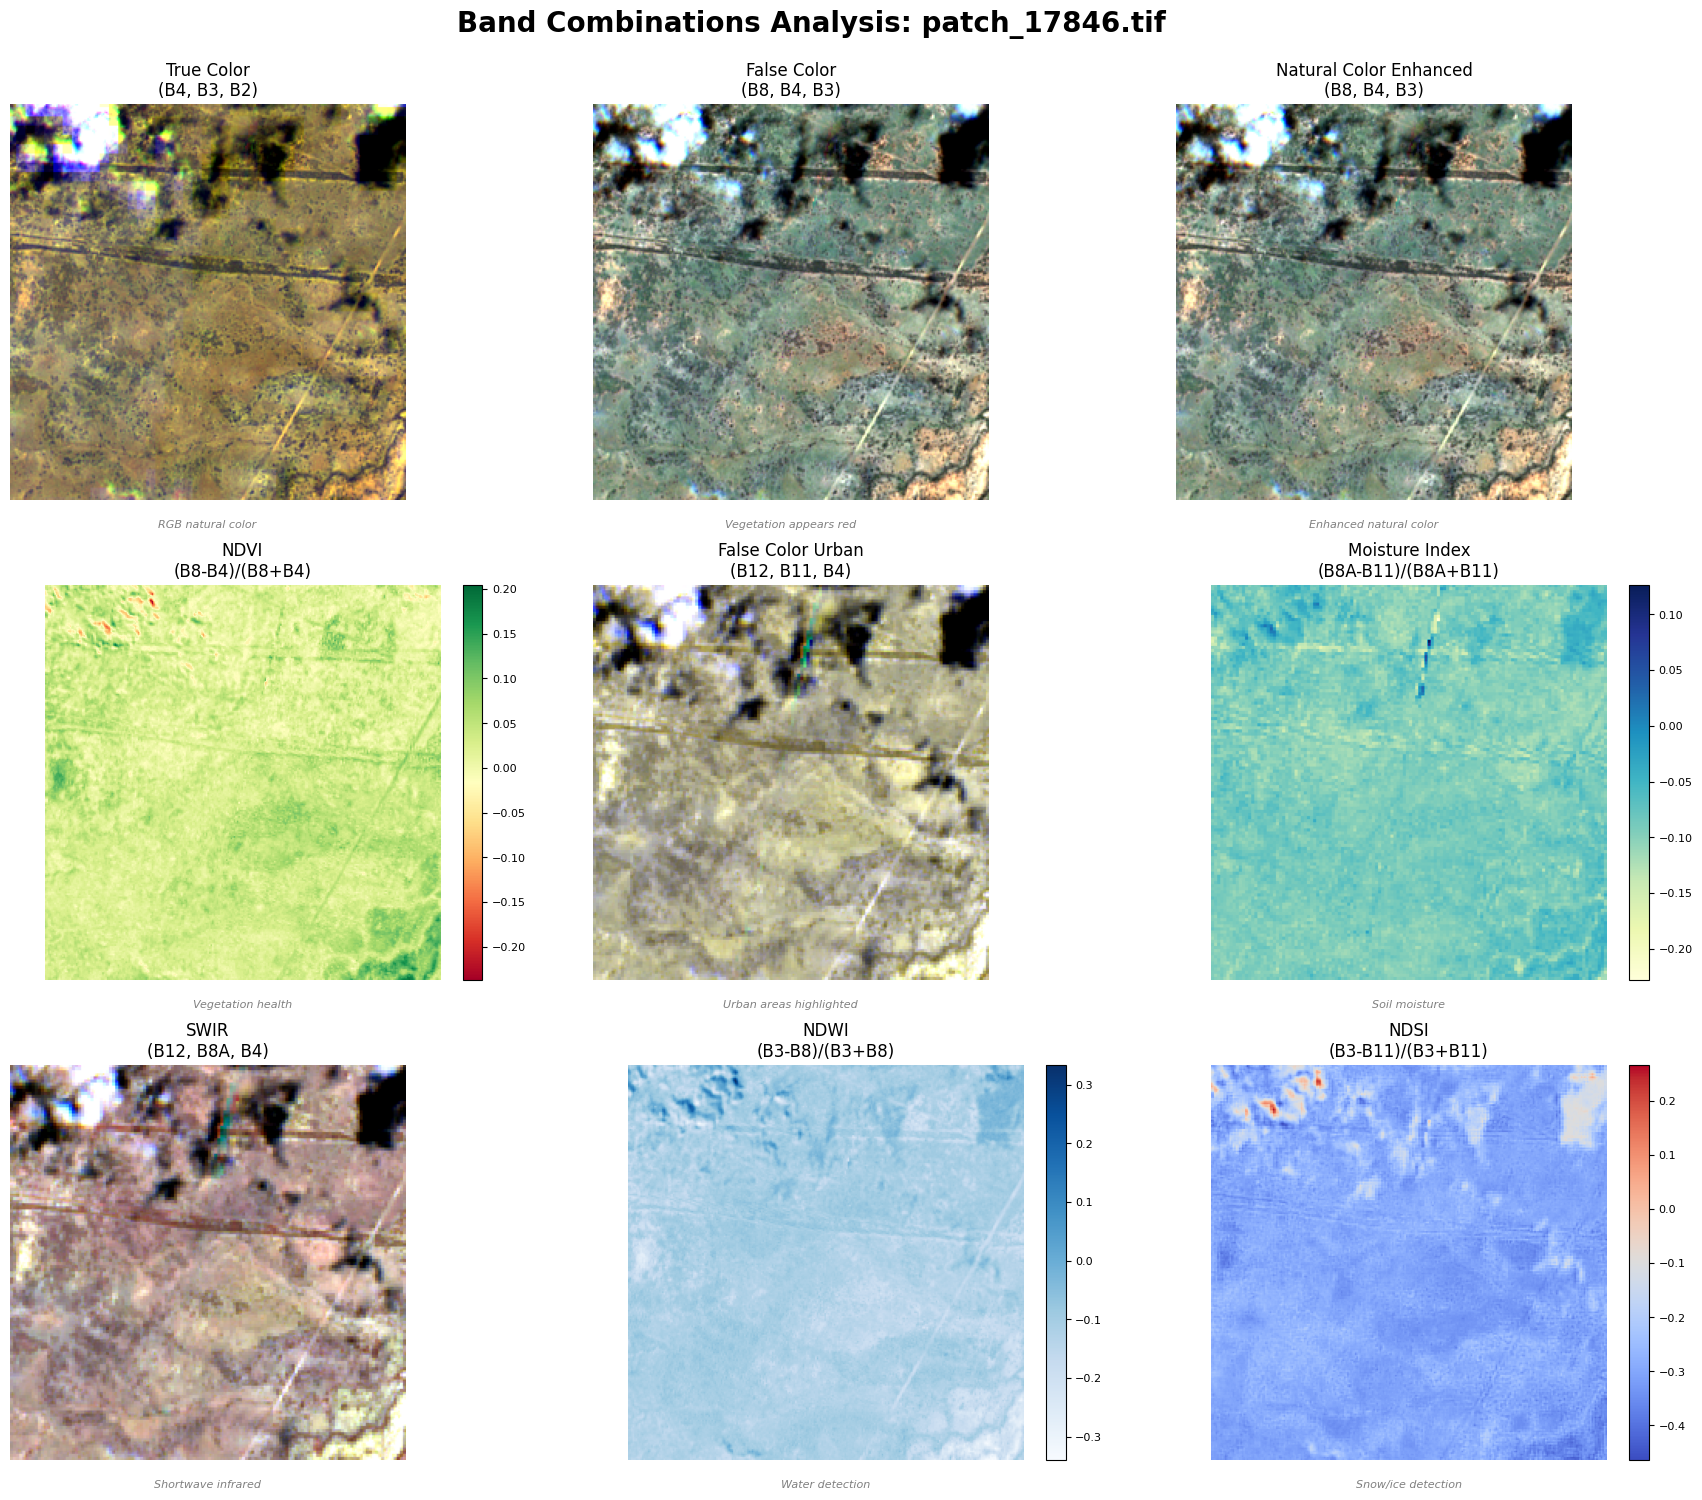

In [18]:

# Display all standard band combinations
fig = visualize_band_combinations(sample_file, show_plot=True)


In [19]:

summary_report = f"""
DATASET SUMMARY REPORT
{'=' * 60}

1. DATASET SIZE:
   - Total patches in index: {len(index_df):,}
   - TIF files found on disk: {len(all_tif_files):,}
   - Difference: {len(index_df) - len(all_tif_files):,}

2. GEOGRAPHIC COVERAGE:
   - Longitude range: [{index_df['lon'].min():.2f}°, {index_df['lon'].max():.2f}°]
   - Latitude range: [{index_df['lat'].min():.2f}°, {index_df['lat'].max():.2f}°]
   - Total coverage: {index_df['lon'].max() - index_df['lon'].min():.2f}° × {index_df['lat'].max() - index_df['lat'].min():.2f}°
   - Appears to be global coverage

3. IMAGE PROPERTIES (from sample):
   - Dimensions: {props_df['width'].mode()[0] if not props_df.empty else 'N/A'}px × {props_df['height'].mode()[0] if not props_df.empty else 'N/A'}px (typical)
   - Number of bands: {props_df['bands'].mode()[0] if not props_df.empty else 'N/A'} (typical)
   - Data type: {props_df['dtype'].mode()[0] if not props_df.empty else 'N/A'}
   - Coordinate system: {props_df['crs'].mode()[0] if not props_df.empty else 'N/A'}

"""

print(summary_report)



DATASET SUMMARY REPORT

1. DATASET SIZE:
   - Total patches in index: 100,000
   - TIF files found on disk: 94,164
   - Difference: 5,836

2. GEOGRAPHIC COVERAGE:
   - Longitude range: [-179.91°, 179.86°]
   - Latitude range: [-83.67°, 83.66°]
   - Total coverage: 359.77° × 167.33°
   - Appears to be global coverage

3. IMAGE PROPERTIES (from sample):
   - Dimensions: 256px × 256px (typical)
   - Number of bands: 12 (typical)
   - Data type: uint16
   - Coordinate system: EPSG:32614





GEOGRAPHIC DISTRIBUTION


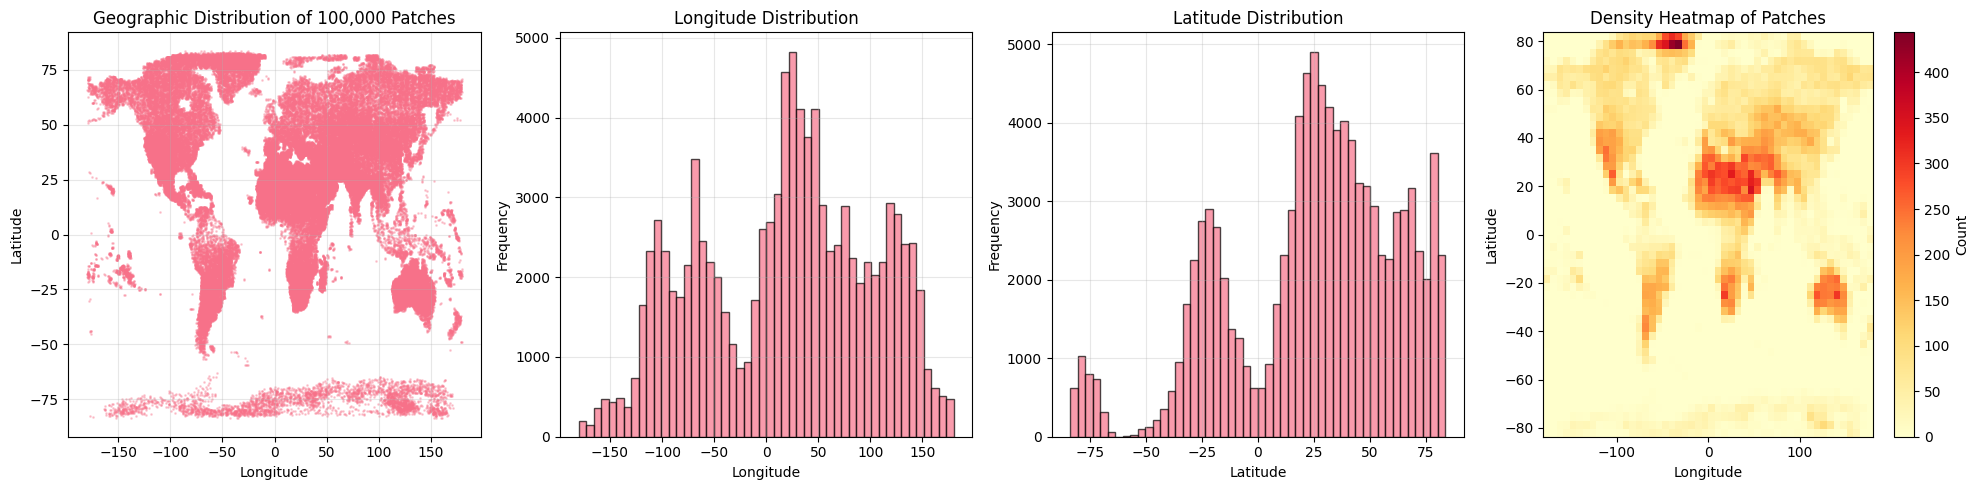


Geographic coverage:
Longitude range: [-179.91, 179.86]
Latitude range: [-83.67, 83.66]
Coverage: 359.77° (lon) × 167.33° (lat)


In [25]:
# ============================================================
# 5. GEOGRAPHIC DISTRIBUTION ANALYSIS
# ============================================================
print("\n" + "=" * 60)
print("GEOGRAPHIC DISTRIBUTION")
print("=" * 60)

# Analyze spatial distribution of patches
# Create a single row of 4 plots to show geographic distribution
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

# Plot 1: Scatter plot of all coordinates
ax1 = axes[0]
ax1.scatter(index_df['lon'], index_df['lat'], alpha=0.3, s=1)
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.set_title(f'Geographic Distribution of {len(index_df):,} Patches')
ax1.grid(True, alpha=0.3)

# Plot 2: Longitude distribution
ax2 = axes[1]
ax2.hist(index_df['lon'], bins=50, edgecolor='black', alpha=0.7)
ax2.set_xlabel('Longitude')
ax2.set_ylabel('Frequency')
ax2.set_title('Longitude Distribution')
ax2.grid(True, alpha=0.3)

# Plot 3: Latitude distribution
ax3 = axes[2]
ax3.hist(index_df['lat'], bins=50, edgecolor='black', alpha=0.7)
ax3.set_xlabel('Latitude')
ax3.set_ylabel('Frequency')
ax3.set_title('Latitude Distribution')
ax3.grid(True, alpha=0.3)

# Plot 4: 2D histogram (heatmap)
ax4 = axes[3]
h = ax4.hist2d(index_df['lon'], index_df['lat'], bins=50, cmap='YlOrRd')
ax4.set_xlabel('Longitude')
ax4.set_ylabel('Latitude')
ax4.set_title('Density Heatmap of Patches')
plt.colorbar(h[3], ax=ax4, label='Count')

plt.tight_layout()
plt.show()

print(f"\nGeographic coverage:")
print(f"Longitude range: [{index_df['lon'].min():.2f}, {index_df['lon'].max():.2f}]")
print(f"Latitude range: [{index_df['lat'].min():.2f}, {index_df['lat'].max():.2f}]")
print(f"Coverage: {index_df['lon'].max() - index_df['lon'].min():.2f}° (lon) × {index_df['lat'].max() - index_df['lat'].min():.2f}° (lat)")


In [5]:
# Function to load a TIF file and save its true color image
def load_and_save_tif_as_image(filepath, output_path=None):
    """
    Load a TIF (GeoTIFF) file and save it as a true color image.
    
    This function reads a multi-band TIF file, extracts the RGB bands,
    normalizes the values, and saves the result as a standard image file.
    
    True Color uses bands B4 (Red), B3 (Green), B2 (Blue) for Sentinel-2 data.
    
    Note: Uses rasterio instead of osgeo/gdal for better compatibility
    
    Args:
        filepath: path to the TIF file to load
        output_path: path where to save the image (optional)
                    If None, will save as '{filepath}_truecolor.png'
    
    Returns:
        tuple: (image_data, metadata) where image_data is a numpy array
               and metadata contains geospatial information
    """
    import rasterio
    import numpy as np
    from PIL import Image
    
    # Open the TIF file using rasterio
    with rasterio.open(filepath) as dataset:
        # Read the image data as a numpy array
        # Get number of bands
        num_bands = dataset.count
        
        # Read all bands
        if num_bands == 1:
            # Single band image - convert to grayscale
            image_data = dataset.read(1)
        else:
            # Multi-band image - read all bands and stack
            # rasterio returns (bands, height, width), we need (height, width, bands)
            image_data = dataset.read()
            image_data = np.transpose(image_data, (1, 2, 0))
        
        # Extract metadata
        metadata = {
            'width': dataset.width,
            'height': dataset.height,
            'bands': num_bands,
            'crs': str(dataset.crs),
            'transform': dataset.transform
        }
    
    print(f"Loaded TIF file: {filepath}")
    print(f"  Dimensions: {metadata['width']} x {metadata['height']}")
    print(f"  Bands: {metadata['bands']}")
    
    # Save as true color image
    if output_path is None:
        # Generate output path from input filepath
        output_path = filepath.replace('.tif', '_truecolor.png').replace('.TIF', '_truecolor.png')
    
    # Prepare image for saving
    if num_bands >= 3:
        # Extract RGB bands for True Color visualization
        # For Sentinel-2: B4 (Red), B3 (Green), B2 (Blue)
        # Assuming bands are ordered: B1, B2, B3, B4, ...
        # So we need indices 3, 2, 1 (0-indexed) for B4, B3, B2
        if num_bands >= 4:
            # Use B4, B3, B2 for true color (Sentinel-2 standard)
            rgb_data = image_data[:, :, [3, 2, 1]]  # B4, B3, B2
            print(f"  Using bands B4, B3, B2 for True Color")
        else:
            # Fallback to first 3 bands if less than 4 bands available
            rgb_data = image_data[:, :, :3]
            print(f"  Using first 3 bands (fallback)")
        
        # Normalize to 0-255 range if needed
        # Check if data is already in 0-255 range
        if rgb_data.max() > 255 or rgb_data.dtype != np.uint8:
            # Normalize from current range to 0-255
            rgb_min = rgb_data.min()
            rgb_max = rgb_data.max()
            rgb_normalized = ((rgb_data - rgb_min) / (rgb_max - rgb_min) * 255).astype(np.uint8)
        else:
            rgb_normalized = rgb_data.astype(np.uint8)
        
        # Create PIL Image and save
        img = Image.fromarray(rgb_normalized, mode='RGB')
        img.save(output_path)
        print(f"Saved true color image to: {output_path}")
        
    elif num_bands == 1:
        # Single band - save as grayscale
        gray_data = image_data
        
        # Normalize to 0-255 range if needed
        if gray_data.max() > 255 or gray_data.dtype != np.uint8:
            gray_min = gray_data.min()
            gray_max = gray_data.max()
            gray_normalized = ((gray_data - gray_min) / (gray_max - gray_min) * 255).astype(np.uint8)
        else:
            gray_normalized = gray_data.astype(np.uint8)
        
        # Create PIL Image and save
        img = Image.fromarray(gray_normalized, mode='L')
        img.save(output_path)
        print(f"Saved grayscale image to: {output_path}")
    
    return image_data, metadata


In [ ]:
filepath = all_tif_files[0]
output_path = os.path.join('/home/minhnl2/here_tech',filepath.split('/')[-1].replace('.tif', '_truecolor.png').replace('.TIF', '_truecolor.png'))
load_and_save_tif_as_image(filepath=filepath, output_path=output_path)

In [6]:
import glob
import os
input_dir = '/home/minhnl2/data/images/data_10'
output_dir = '/home/minhnl2/data/images/data_10_png'
os.makedirs(output_dir, exist_ok=True)


all_tif_files = glob.glob(os.path.join(input_dir, '*.tif')) + glob.glob(os.path.join(input_dir, '*.TIF'))

for filepath in all_tif_files:
    # Generate output filename
    filename = filepath.split('/')[-1]
    output_filename = filename.replace('.tif', '.png').replace('.TIF', '.png')
    output_path = os.path.join(output_dir, output_filename)
    
    # Load and save the image
    try:
        load_and_save_tif_as_image(filepath=filepath, output_path=output_path)
    except Exception as e:
        print(f"Error processing {filepath}: {e}")


Loaded TIF file: /home/minhnl2/data/images/data_10/patch_76426.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_76426.png


/tmp/ipykernel_1055761/1658435702.py:86: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  img = Image.fromarray(rgb_normalized, mode='RGB')


Loaded TIF file: /home/minhnl2/data/images/data_10/patch_44331.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_44331.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_79926.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_79926.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_34953.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_34953.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_48090.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_48090.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_16305.tif
  Dimensions: 256 x 256
  Bands: 12
 

/tmp/ipykernel_1055761/1658435702.py:81: RuntimeWarning: invalid value encountered in divide
  rgb_normalized = ((rgb_data - rgb_min) / (rgb_max - rgb_min) * 255).astype(np.uint8)
/tmp/ipykernel_1055761/1658435702.py:81: RuntimeWarning: invalid value encountered in cast
  rgb_normalized = ((rgb_data - rgb_min) / (rgb_max - rgb_min) * 255).astype(np.uint8)


Loaded TIF file: /home/minhnl2/data/images/data_10/patch_69467.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_69467.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_84673.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_84673.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_66967.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_66967.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_6370.tif
  Dimensions: 256 x 256
  Bands: 12
  Using bands B4, B3, B2 for True Color
Saved true color image to: /home/minhnl2/data/images/data_10_png/patch_6370.png
Loaded TIF file: /home/minhnl2/data/images/data_10/patch_18894.tif
  Dimensions: 256 x 256
  Bands: 12
  U

# Feature comparison

In [ ]:
import torch
import clip
from PIL import Image
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# Using ViT-B/32 as it provides a good balance between speed and accuracy
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
print(f"CLIP model loaded on device: {device}")


CLIP model loaded on device: cuda


In [ ]:
# Define file paths for local and global view images
local_fp = "/home/minhnl2/here_tech/local_NY.png"
global_fp = "/home/minhnl2/here_tech/global_LA.png"

local_img = preprocess(Image.open(local_fp)).unsqueeze(0).to(device)
global_img = preprocess(Image.open(global_fp)).unsqueeze(0).to(device)

with torch.no_grad():
    local_features = model.encode_image(local_img)
    global_features = model.encode_image(global_img)

local_features = local_features / local_features.norm(dim=-1, keepdim=True)
global_features = global_features / global_features.norm(dim=-1, keepdim=True)

similarity = (local_features @ global_features.T).item()

print(f"Cosine similarity between local and global views: {similarity:.4f}")


Cosine similarity between local and global views: 0.6938


In [6]:
# DINOV2: SIMILARITY MEASUREMENT BETWEEN VIEWS
import torch
import torch.nn.functional as F
from PIL import Image as PILImage
import torchvision.transforms as transforms

# Check GPU availability
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"\nDevice: {device}")

# Load DINOv2 model
# Using ViT-B/14 (base model) for good balance of speed and quality
# Options: dinov2_vits14 (small), dinov2_vitb14 (base), dinov2_vitl14 (large), dinov2_vitg14 (giant)
print("\nLoading DINOv2 ViT-B/14 model...")

dinov2_model = torch.hub.load('facebookresearch/dinov2', 'dinov2_vitl14')
dinov2_model = dinov2_model.to(device)
dinov2_model.eval()


dinov2_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # DINOv2 expects 224x224 input
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])


Device: cuda

Loading DINOv2 ViT-B/14 model...


Using cache found in /home/minhnl2/.cache/torch/hub/facebookresearch_dinov2_main
/home/minhnl2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/swiglu_ffn.py:43: UserWarning: xFormers is available (SwiGLU)
  warnings.warn("xFormers is available (SwiGLU)")
/home/minhnl2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/attention.py:28: UserWarning: xFormers is available (Attention)
  warnings.warn("xFormers is available (Attention)")
/home/minhnl2/.cache/torch/hub/facebookresearch_dinov2_main/dinov2/layers/block.py:34: UserWarning: xFormers is available (Block)
  warnings.warn("xFormers is available (Block)")


In [7]:
# DINOv2 Feature Extraction Functions

import numpy as np

def extract_dinov2_features(image, model, transform, device):
    # Convert numpy array to PIL Image if needed
    if isinstance(image, np.ndarray):
        # Normalize to 0-255 range if needed
        if image.max() <= 1.0:
            image = (image * 255).astype(np.uint8)
        image = PILImage.fromarray(image)
    
    # Preprocess and move to device
    img_tensor = transform(image).unsqueeze(0).to(device)
    
    # Extract features
    with torch.no_grad():
        features = model(img_tensor)
    
    return features


def compute_cosine_similarity(features1, features2):
    # Normalize features to unit vectors
    features1_norm = F.normalize(features1, p=2, dim=-1)
    features2_norm = F.normalize(features2, p=2, dim=-1)
    
    # Compute cosine similarity
    similarity = (features1_norm @ features2_norm.T).item()
    
    return similarity


def compare_two_images(filepath1, filepath2, model=None, transform=None, device=None):
    # Use global variables if not provided
    if model is None:
        model = dinov2_model
    if transform is None:
        transform = dinov2_transform
    if device is None:
        device = globals().get('device', torch.device('cpu'))
    
    # Load first image
    img1 = PILImage.open(filepath1).convert('RGB')
    
    # Load second image
    img2 = PILImage.open(filepath2).convert('RGB')
    
    # Extract DINOv2 features for both images
    print("Extracting DINOv2 features from both images...")
    features1 = extract_dinov2_features(img1, model, transform, device)
    features2 = extract_dinov2_features(img2, model, transform, device)
    
    # Compute similarity
    similarity = compute_cosine_similarity(features1, features2)
    
    return similarity, features1, features2


def compare_global_local_views(filepath, center_x=0.5, center_y=0.5, zoom_factor=3.0,
                               model=None, transform=None, device=None):
    # Use global variables if not provided
    if model is None:
        model = dinov2_model
    if transform is None:
        transform = dinov2_transform
    if device is None:
        device = globals().get('device', torch.device('cpu'))
    
    # Read satellite image
    with rasterio.open(filepath) as src:
        data = src.read().astype(float)
    
    # Create global view (full image RGB)
    global_rgb = np.stack([
        normalize_band(data[2]),
        normalize_band(data[1]),
        normalize_band(data[0])
    ], axis=-1)
    global_rgb = (global_rgb * 255).astype(np.uint8)
    
    # Create local view (zoomed region)
    zoomed_data, crop_box = zoom_into_region(filepath, center_x, center_y, zoom_factor)
    local_rgb = np.stack([
        normalize_band(zoomed_data[2]),
        normalize_band(zoomed_data[1]),
        normalize_band(zoomed_data[0])
    ], axis=-1)
    local_rgb = (local_rgb * 255).astype(np.uint8)
    
    # Extract DINOv2 features
    print("Extracting DINOv2 features...")
    global_features = extract_dinov2_features(global_rgb, model, transform, device)
    local_features = extract_dinov2_features(local_rgb, model, transform, device)
    
    # Compute similarity
    similarity = compute_cosine_similarity(global_features, local_features)
    
    return similarity, global_features, local_features





In [8]:
# Define file paths for local and global view images
local_fp = "/home/minhnl2/here_tech/local_NY.png"
global_fp = "/home/minhnl2/here_tech/global_LA.png"


# Compare the two images
print("\nComparing images using DINOv2...")
similarity, features1, features2 = compare_two_images(
    filepath1=local_fp,
    filepath2=global_fp
)

print(f"\nDINOv2 Score: {similarity:.4f}")



Comparing images using DINOv2...
Extracting DINOv2 features from both images...

DINOv2 Score: 0.7180


In [ ]:
import os
import random
from PIL import Image
import torch
import clip
from tqdm import tqdm
import numpy as np

def clip_similarity(image_dir="/home/minhnl2/data/images/data_10_png", K=10, patch_size=64):

    os.environ["CUDA_VISIBLE_DEVICES"] = "1"

    # Using ViT-B/32 as it provides a good balance between speed and accuracy
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)
    print(f"CLIP model loaded on device: {device}")

    # Get all image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

    print(f"Found {len(image_files)} images in {image_dir}")

    all_similarities = []

    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        
        # Load the full image
        full_img = Image.open(img_path).convert('RGB')
        width, height = full_img.size
        
        # Skip if image is too small for patches
        if width < patch_size or height < patch_size:
            print(f"Skipping {img_file}: image too small")
            continue
        
        # Extract features from full image
        full_img_tensor = preprocess(full_img).unsqueeze(0).to(device)
        with torch.no_grad():
            full_features = model.encode_image(full_img_tensor)
        full_features = full_features / full_features.norm(dim=-1, keepdim=True)
        
        image_similarities = []
        
        # Extract K random patches
        for k in range(K):
            # Random crop coordinates
            left = random.randint(0, width - patch_size)
            top = random.randint(0, height - patch_size)
            right = left + patch_size
            bottom = top + patch_size
            
            # Extract patch
            patch = full_img.crop((left, top, right, bottom))
            
            # Resize patch to 224x224 before processing
            # patch = patch.resize((224, 224), Image.BILINEAR)
            
            # Extract features from patch
            patch_tensor = preprocess(patch).unsqueeze(0).to(device)
            with torch.no_grad():
                patch_features = model.encode_image(patch_tensor)
            patch_features = patch_features / patch_features.norm(dim=-1, keepdim=True)
            
            # Compute cosine similarity
            similarity = (patch_features @ full_features.T).item()
            image_similarities.append(similarity)
        
        # Compute average similarity for this image
        avg_similarity = np.mean(image_similarities)
        all_similarities.append(avg_similarity)
        
        print(f"{img_file}: Average similarity = {avg_similarity:.4f}")

    # Compute overall average
    overall_avg = np.mean(all_similarities)
    print(f"\nOverall average cosine similarity across all images: {overall_avg:.4f}")
    print(f"Standard deviation: {np.std(all_similarities):.4f}")


CLIP model loaded on device: cuda
Found 4162 images in /home/minhnl2/data/images/data_10_png
patch_32884.png: Average similarity = 0.7394
patch_63611.png: Average similarity = 0.7288
patch_51106.png: Average similarity = 0.8690
patch_91444.png: Average similarity = 0.7172
patch_36189.png: Average similarity = 1.0000
patch_31625.png: Average similarity = 0.7243
patch_37718.png: Average similarity = 0.7391
patch_53936.png: Average similarity = 0.7880
patch_50797.png: Average similarity = 0.9143
patch_62080.png: Average similarity = 0.7105
patch_52989.png: Average similarity = 0.8230
patch_68432.png: Average similarity = 0.6209
patch_17350.png: Average similarity = 0.7789
patch_85626.png: Average similarity = 0.5930
patch_67932.png: Average similarity = 0.6068
patch_86887.png: Average similarity = 1.0000
patch_56084.png: Average similarity = 0.7591
patch_64793.png: Average similarity = 0.7688
patch_45364.png: Average similarity = 0.6673
patch_51728.png: Average similarity = 1.0000
patch_3

In [1]:
import os
import random
from PIL import Image
import torch
import numpy as np

def dinov2_similarity(image_dir, K=10, patch_size=64):

    os.environ["CUDA_VISIBLE_DEVICES"] = "1"

    # Using ViT-B/32 as it provides a good balance between speed and accuracy
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model, preprocess = clip.load("ViT-B/32", device=device)
    print(f"CLIP model loaded on device: {device}")


    # Directory containing images
    image_dir = "/home/minhnl2/data/images/data_10_png"

    # Parameters
    K = 10  # Number of random patches per image
    patch_size = 64  # Size of each patch (224x224 for CLIP/DINOv2)

    # Get all image files
    image_files = [f for f in os.listdir(image_dir) if f.endswith('.png')]

    print(f"Found {len(image_files)} images in {image_dir}")

    all_similarities = []

    for img_file in image_files:
        img_path = os.path.join(image_dir, img_file)
        
        # Load the full image
        full_img = Image.open(img_path).convert('RGB')
        width, height = full_img.size
        
        # Skip if image is too small for patches
        if width < patch_size or height < patch_size:
            print(f"Skipping {img_file}: image too small")
            continue
        
        # Extract features from full image
        full_features = extract_dinov2_features(full_img, dinov2_model, dinov2_transform, device)
        
        image_similarities = []
        
        # Extract K random patches
        for k in range(K):
            # Random crop coordinates
            left = random.randint(0, width - patch_size)
            top = random.randint(0, height - patch_size)
            right = left + patch_size
            bottom = top + patch_size
            
            # Extract patch
            patch = full_img.crop((left, top, right, bottom))
            
            # Extract features from patch
            patch_features = extract_dinov2_features(patch, dinov2_model, dinov2_transform, device)
            
            # Compute cosine similarity
            similarity = compute_cosine_similarity(patch_features, full_features)
            image_similarities.append(similarity)
        
        # Compute average similarity for this image
        avg_similarity = np.mean(image_similarities)
        all_similarities.append(avg_similarity)
        
        print(f"{img_file}: Average similarity = {avg_similarity:.4f}")

    # Compute overall average
    overall_avg = np.mean(all_similarities)
    print(f"\nOverall average cosine similarity across all images: {overall_avg:.4f}")
    print(f"Standard deviation: {np.std(all_similarities):.4f}")
